In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 150)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random

number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

slice = random.sample(range(511),10)

number_codes = number_codes[:,slice].tolist() 

In [6]:
classes = []
for i in range(10):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [19]:
matrix_errors = []

for i in range(9):
    for j in range(i+1,10):
        matrix_errors.append(10 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
np.min(matrix_errors)
        # print(number_codes[i], number_codes[j], 3 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
#np.mean(matrix_errors)  

1

In [8]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:972
number of class2:645

 ****** Running generation 0 ****** 

Population's average fitness: 0.48372 stdev: 0.08812
Best fitness: 0.68646 - size: (2, 13) - species 2 - id 41
Average adjusted fitness: 0.198
Mean genetic distance 2.937, standard deviation 0.494
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 11.064 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54531 stdev: 0.09418
Best fitness: 0.74706 - size: (3, 15) - species 3 - id 377
Average adjusted fitness: 0.224
Mean genetic distance 2.970, standard deviation 0.497
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 11.249 sec (11.156 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57457 stdev: 0.08292
Best fitness: 0.76252 - size: (4, 17) - species 9 - id 526
Average adjusted fitness: 0.234
Mean genetic distance 3.029, standard deviation 0.512
Population of 199 members in 31 species
Total extinct

Population's average fitness: 0.62629 stdev: 0.10733
Best fitness: 0.79221 - size: (7, 20) - species 8 - id 3188
Average adjusted fitness: 0.237
Mean genetic distance 3.254, standard deviation 0.531
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 13.628 sec (13.262 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.63800 stdev: 0.10190
Best fitness: 0.79221 - size: (7, 20) - species 8 - id 3188
Average adjusted fitness: 0.316
Mean genetic distance 3.262, standard deviation 0.538
Population of 194 members in 30 species
Total extinctions: 0
Generation time: 13.442 sec (13.115 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.63778 stdev: 0.10530
Best fitness: 0.79221 - size: (7, 20) - species 8 - id 3188
Average adjusted fitness: 0.280
Mean genetic distance 3.263, standard deviation 0.536
Population of 191 members in 29 species
Total extinctions: 0
Generation time: 13.382 sec (13.112 average)

 ***

Population's average fitness: 0.65631 stdev: 0.09984
Best fitness: 0.80705 - size: (7, 21) - species 8 - id 4741
Average adjusted fitness: 0.271
Mean genetic distance 3.320, standard deviation 0.578
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 15.571 sec (15.407 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.65331 stdev: 0.11093
Best fitness: 0.81014 - size: (11, 30) - species 53 - id 6955
Average adjusted fitness: 0.266
Mean genetic distance 3.302, standard deviation 0.555
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 16.187 sec (15.522 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.65445 stdev: 0.11167
Best fitness: 0.81014 - size: (11, 30) - species 53 - id 6955
Average adjusted fitness: 0.330
Mean genetic distance 3.296, standard deviation 0.553
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 16.309 sec (15.654 average)



Population's average fitness: 0.66838 stdev: 0.12111
Best fitness: 0.81138 - size: (12, 36) - species 55 - id 9344
Average adjusted fitness: 0.409
Mean genetic distance 3.359, standard deviation 0.634
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 16.899 sec (16.672 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.65747 stdev: 0.12168
Best fitness: 0.81138 - size: (12, 36) - species 55 - id 9344
Average adjusted fitness: 0.324
Mean genetic distance 3.332, standard deviation 0.651
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 16.765 sec (16.658 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.66512 stdev: 0.11453
Best fitness: 0.81138 - size: (12, 36) - species 55 - id 9344
Average adjusted fitness: 0.357
Mean genetic distance 3.326, standard deviation 0.639
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 16.694 sec (16.692 average)

Population's average fitness: 0.65155 stdev: 0.12428
Best fitness: 0.81942 - size: (24, 59) - species 60 - id 14056
Average adjusted fitness: 0.250
Mean genetic distance 3.259, standard deviation 0.636
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 21.569 sec (19.759 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.65776 stdev: 0.11403
Best fitness: 0.81942 - size: (24, 59) - species 60 - id 14056
Average adjusted fitness: 0.295
Mean genetic distance 3.292, standard deviation 0.603
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 21.668 sec (20.047 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.65751 stdev: 0.11521
Best fitness: 0.81942 - size: (24, 59) - species 60 - id 14056
Average adjusted fitness: 0.294
Mean genetic distance 3.290, standard deviation 0.616
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 20.382 sec (20.188 avera

Population's average fitness: 0.67717 stdev: 0.11301
Best fitness: 0.84292 - size: (26, 63) - species 60 - id 16909
Average adjusted fitness: 0.285
Mean genetic distance 3.111, standard deviation 0.611
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 21.318 sec (21.883 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.67068 stdev: 0.10993
Best fitness: 0.84292 - size: (26, 63) - species 60 - id 16909
Average adjusted fitness: 0.268
Mean genetic distance 3.122, standard deviation 0.628
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 21.334 sec (21.805 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.67485 stdev: 0.12074
Best fitness: 0.84292 - size: (26, 63) - species 60 - id 16909
Average adjusted fitness: 0.464
Mean genetic distance 3.146, standard deviation 0.616
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 22.798 sec (21.847 ave

Population's average fitness: 0.68073 stdev: 0.11375
Best fitness: 0.84292 - size: (26, 63) - species 60 - id 16909
Average adjusted fitness: 0.282
Mean genetic distance 3.181, standard deviation 0.570
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 23.007 sec (23.330 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.67952 stdev: 0.10835
Best fitness: 0.84292 - size: (26, 63) - species 60 - id 16909
Average adjusted fitness: 0.282
Mean genetic distance 3.158, standard deviation 0.570
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 22.832 sec (23.214 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.66668 stdev: 0.11325
Best fitness: 0.84292 - size: (26, 63) - species 60 - id 16909
Average adjusted fitness: 0.294
Mean genetic distance 3.152, standard deviation 0.565
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 22.619 sec (23.088 ave

Population's average fitness: 0.59239 stdev: 0.07105
Best fitness: 0.74397 - size: (6, 18) - species 31 - id 1903
Average adjusted fitness: 0.141
Mean genetic distance 3.294, standard deviation 0.523
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 12.524 sec (13.044 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60094 stdev: 0.07136
Best fitness: 0.74397 - size: (6, 18) - species 31 - id 1903
Average adjusted fitness: 0.176
Mean genetic distance 3.272, standard deviation 0.507
Population of 193 members in 30 species
Total extinctions: 0
Generation time: 13.177 sec (13.090 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.59459 stdev: 0.07188
Best fitness: 0.74397 - size: (6, 18) - species 31 - id 1903
Average adjusted fitness: 0.142
Mean genetic distance 3.290, standard deviation 0.508
Population of 193 members in 30 species
Total extinctions: 0
Generation time: 13.427 sec (13.149 average)

 

Population's average fitness: 0.60407 stdev: 0.07854
Best fitness: 0.76129 - size: (7, 20) - species 31 - id 4369
Average adjusted fitness: 0.190
Mean genetic distance 3.324, standard deviation 0.554
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 15.399 sec (14.832 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.61016 stdev: 0.07653
Best fitness: 0.76129 - size: (7, 20) - species 31 - id 4369
Average adjusted fitness: 0.146
Mean genetic distance 3.327, standard deviation 0.550
Population of 196 members in 24 species
Total extinctions: 0
Generation time: 15.263 sec (14.886 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.61750 stdev: 0.07333
Best fitness: 0.76129 - size: (7, 20) - species 31 - id 4369
Average adjusted fitness: 0.143
Mean genetic distance 3.315, standard deviation 0.553
Population of 195 members in 23 species
Total extinctions: 0
Generation time: 15.065 sec (14.949 average)

 

Population's average fitness: 0.61906 stdev: 0.07487
Best fitness: 0.77304 - size: (9, 33) - species 1 - id 9517
Average adjusted fitness: 0.163
Mean genetic distance 3.292, standard deviation 0.564
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 16.272 sec (16.130 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.61446 stdev: 0.08243
Best fitness: 0.77304 - size: (9, 33) - species 1 - id 9517
Average adjusted fitness: 0.211
Mean genetic distance 3.276, standard deviation 0.557
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 15.611 sec (16.127 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.61850 stdev: 0.07408
Best fitness: 0.77304 - size: (9, 33) - species 1 - id 9517
Average adjusted fitness: 0.187
Mean genetic distance 3.284, standard deviation 0.572
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 15.689 sec (16.142 average)

 ***

Population's average fitness: 0.61656 stdev: 0.08324
Best fitness: 0.78046 - size: (11, 37) - species 1 - id 13372
Average adjusted fitness: 0.152
Mean genetic distance 3.251, standard deviation 0.626
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 17.636 sec (16.974 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.62743 stdev: 0.08139
Best fitness: 0.78046 - size: (11, 37) - species 1 - id 13372
Average adjusted fitness: 0.200
Mean genetic distance 3.223, standard deviation 0.601
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 17.181 sec (16.968 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.62441 stdev: 0.08612
Best fitness: 0.78046 - size: (11, 37) - species 1 - id 13372
Average adjusted fitness: 0.197
Mean genetic distance 3.239, standard deviation 0.608
Population of 205 members in 15 species
Total extinctions: 0
Generation time: 17.605 sec (17.037 average)

Population's average fitness: 0.62413 stdev: 0.08554
Best fitness: 0.79406 - size: (8, 24) - species 69 - id 17228
Average adjusted fitness: 0.203
Mean genetic distance 3.251, standard deviation 0.628
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 19.277 sec (19.244 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.61777 stdev: 0.08579
Best fitness: 0.79406 - size: (8, 24) - species 69 - id 17228
Average adjusted fitness: 0.191
Mean genetic distance 3.252, standard deviation 0.633
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 20.334 sec (19.442 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.62910 stdev: 0.08313
Best fitness: 0.79406 - size: (8, 24) - species 69 - id 17228
Average adjusted fitness: 0.160
Mean genetic distance 3.234, standard deviation 0.614
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 19.399 sec (19.446 averag

Population's average fitness: 0.62642 stdev: 0.09268
Best fitness: 0.79406 - size: (8, 24) - species 69 - id 17228
Average adjusted fitness: 0.230
Mean genetic distance 3.116, standard deviation 0.565
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 18.977 sec (19.792 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.61728 stdev: 0.09581
Best fitness: 0.79406 - size: (8, 24) - species 69 - id 17228
Average adjusted fitness: 0.220
Mean genetic distance 3.086, standard deviation 0.560
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 19.509 sec (19.868 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.60836 stdev: 0.09212
Best fitness: 0.79406 - size: (8, 24) - species 69 - id 17228
Average adjusted fitness: 0.213
Mean genetic distance 3.103, standard deviation 0.560
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 19.768 sec (19.922 averag

Population's average fitness: 0.66343 stdev: 0.14689
Best fitness: 0.83364 - size: (5, 15) - species 32 - id 1667
Average adjusted fitness: 0.396
Mean genetic distance 3.193, standard deviation 0.475
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 12.569 sec (12.323 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.66602 stdev: 0.14627
Best fitness: 0.84045 - size: (6, 17) - species 32 - id 2035
Average adjusted fitness: 0.395
Mean genetic distance 3.210, standard deviation 0.477
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 12.728 sec (12.461 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66100 stdev: 0.14993
Best fitness: 0.84045 - size: (6, 17) - species 32 - id 2035
Average adjusted fitness: 0.357
Mean genetic distance 3.200, standard deviation 0.472
Population of 203 members in 43 species
Total extinctions: 0
Generation time: 13.170 sec (12.638 average)

 

Population's average fitness: 0.68331 stdev: 0.13714
Best fitness: 0.84601 - size: (8, 28) - species 27 - id 4563
Average adjusted fitness: 0.374
Mean genetic distance 3.252, standard deviation 0.509
Population of 192 members in 23 species
Total extinctions: 0
Generation time: 14.675 sec (14.288 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.66310 stdev: 0.14472
Best fitness: 0.84601 - size: (8, 28) - species 27 - id 4563
Average adjusted fitness: 0.358
Mean genetic distance 3.244, standard deviation 0.521
Population of 195 members in 23 species
Total extinctions: 0
Generation time: 13.946 sec (14.257 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.66798 stdev: 0.15552
Best fitness: 0.85034 - size: (9, 30) - species 27 - id 5455
Average adjusted fitness: 0.383
Mean genetic distance 3.245, standard deviation 0.520
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 14.166 sec (14.263 average)

 

Population's average fitness: 0.65947 stdev: 0.14723
Best fitness: 0.85034 - size: (9, 30) - species 27 - id 5455
Average adjusted fitness: 0.377
Mean genetic distance 3.297, standard deviation 0.556
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 17.160 sec (17.012 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.65176 stdev: 0.15143
Best fitness: 0.85034 - size: (9, 30) - species 27 - id 5455
Average adjusted fitness: 0.380
Mean genetic distance 3.299, standard deviation 0.554
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 17.025 sec (17.076 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.67894 stdev: 0.13057
Best fitness: 0.85034 - size: (9, 30) - species 27 - id 5455
Average adjusted fitness: 0.377
Mean genetic distance 3.290, standard deviation 0.554
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 17.876 sec (17.221 average)

 

Population's average fitness: 0.66573 stdev: 0.15223
Best fitness: 0.85034 - size: (9, 30) - species 60 - id 5455
Average adjusted fitness: 0.365
Mean genetic distance 3.258, standard deviation 0.618
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 18.716 sec (19.122 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.65723 stdev: 0.15840
Best fitness: 0.85034 - size: (9, 30) - species 60 - id 5455
Average adjusted fitness: 0.359
Mean genetic distance 3.269, standard deviation 0.599
Population of 205 members in 14 species
Total extinctions: 0
Generation time: 19.274 sec (19.059 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.66714 stdev: 0.15349
Best fitness: 0.85034 - size: (9, 30) - species 60 - id 5455
Average adjusted fitness: 0.377
Mean genetic distance 3.246, standard deviation 0.651
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 19.832 sec (19.109 average)

 

Population's average fitness: 0.66006 stdev: 0.15521
Best fitness: 0.85220 - size: (12, 33) - species 60 - id 14204
Average adjusted fitness: 0.365
Mean genetic distance 3.212, standard deviation 0.567
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 19.624 sec (19.922 average)

 ****** Running generation 109 ****** 

Population's average fitness: 0.65930 stdev: 0.16250
Best fitness: 0.85220 - size: (12, 33) - species 60 - id 14204
Average adjusted fitness: 0.345
Mean genetic distance 3.213, standard deviation 0.586
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 20.711 sec (20.059 average)

 ****** Running generation 110 ****** 

Population's average fitness: 0.66062 stdev: 0.16676
Best fitness: 0.85220 - size: (12, 33) - species 60 - id 14204
Average adjusted fitness: 0.352
Mean genetic distance 3.199, standard deviation 0.591
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 20.595 sec (20.212 ave

Population's average fitness: 0.64648 stdev: 0.18406
Best fitness: 0.85591 - size: (10, 30) - species 17 - id 20325
Average adjusted fitness: 0.349
Mean genetic distance 3.109, standard deviation 0.557
Population of 205 members in 16 species
Total extinctions: 0
Generation time: 22.250 sec (20.616 average)

 ****** Running generation 133 ****** 

Population's average fitness: 0.67255 stdev: 0.17349
Best fitness: 0.85591 - size: (10, 30) - species 17 - id 20325
Average adjusted fitness: 0.400
Mean genetic distance 3.127, standard deviation 0.550
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 21.536 sec (20.715 average)

 ****** Running generation 134 ****** 

Population's average fitness: 0.68420 stdev: 0.16217
Best fitness: 0.85591 - size: (10, 30) - species 17 - id 20325
Average adjusted fitness: 0.382
Mean genetic distance 3.126, standard deviation 0.569
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 21.118 sec (20.797 ave

Population's average fitness: 0.57701 stdev: 0.08956
Best fitness: 0.74273 - size: (3, 17) - species 21 - id 662
Average adjusted fitness: 0.246
Mean genetic distance 3.216, standard deviation 0.487
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 12.276 sec (11.294 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58199 stdev: 0.09387
Best fitness: 0.74273 - size: (3, 17) - species 21 - id 662
Average adjusted fitness: 0.216
Mean genetic distance 3.234, standard deviation 0.472
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 12.300 sec (11.419 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59498 stdev: 0.08747
Best fitness: 0.74273 - size: (3, 17) - species 21 - id 662
Average adjusted fitness: 0.201
Mean genetic distance 3.227, standard deviation 0.467
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 12.706 sec (11.562 average)

 *****

Population's average fitness: 0.62072 stdev: 0.10625
Best fitness: 0.79097 - size: (7, 22) - species 6 - id 2906
Average adjusted fitness: 0.239
Mean genetic distance 3.290, standard deviation 0.492
Population of 193 members in 34 species
Total extinctions: 0
Generation time: 13.184 sec (13.735 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.61924 stdev: 0.10324
Best fitness: 0.79097 - size: (7, 22) - species 6 - id 2906
Average adjusted fitness: 0.226
Mean genetic distance 3.293, standard deviation 0.508
Population of 191 members in 31 species
Total extinctions: 0
Generation time: 13.327 sec (13.689 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.62494 stdev: 0.10095
Best fitness: 0.79097 - size: (7, 22) - species 6 - id 2906
Average adjusted fitness: 0.241
Mean genetic distance 3.265, standard deviation 0.503
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 13.614 sec (13.626 average)

 ***

Population's average fitness: 0.62508 stdev: 0.10238
Best fitness: 0.80705 - size: (8, 29) - species 39 - id 6302
Average adjusted fitness: 0.251
Mean genetic distance 3.318, standard deviation 0.523
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 15.944 sec (15.453 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.62582 stdev: 0.10272
Best fitness: 0.80705 - size: (8, 29) - species 39 - id 6302
Average adjusted fitness: 0.247
Mean genetic distance 3.306, standard deviation 0.536
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 15.807 sec (15.483 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.63357 stdev: 0.10052
Best fitness: 0.80705 - size: (8, 29) - species 39 - id 6302
Average adjusted fitness: 0.275
Mean genetic distance 3.318, standard deviation 0.545
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 15.535 sec (15.525 average)

 

Population's average fitness: 0.63697 stdev: 0.11391
Best fitness: 0.80705 - size: (8, 29) - species 39 - id 6302
Average adjusted fitness: 0.275
Mean genetic distance 3.274, standard deviation 0.554
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 16.895 sec (16.415 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.64677 stdev: 0.10512
Best fitness: 0.80705 - size: (8, 29) - species 39 - id 6302
Average adjusted fitness: 0.267
Mean genetic distance 3.286, standard deviation 0.539
Population of 203 members in 22 species
Total extinctions: 0
Generation time: 16.981 sec (16.469 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.65053 stdev: 0.10401
Best fitness: 0.80705 - size: (8, 29) - species 39 - id 6302
Average adjusted fitness: 0.248
Mean genetic distance 3.255, standard deviation 0.559
Population of 203 members in 21 species
Total extinctions: 0
Generation time: 17.063 sec (16.536 average)

 

Population's average fitness: 0.63877 stdev: 0.11637
Best fitness: 0.80767 - size: (8, 29) - species 39 - id 13198
Average adjusted fitness: 0.268
Mean genetic distance 3.347, standard deviation 0.628
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 18.726 sec (18.559 average)

 ****** Running generation 103 ****** 

Population's average fitness: 0.64781 stdev: 0.10291
Best fitness: 0.80767 - size: (8, 29) - species 39 - id 13198
Average adjusted fitness: 0.244
Mean genetic distance 3.311, standard deviation 0.596
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 18.089 sec (18.544 average)

 ****** Running generation 104 ****** 

Population's average fitness: 0.64155 stdev: 0.11122
Best fitness: 0.80767 - size: (8, 29) - species 39 - id 13198
Average adjusted fitness: 0.335
Mean genetic distance 3.324, standard deviation 0.579
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 18.798 sec (18.659 averag

Population's average fitness: 0.64018 stdev: 0.11487
Best fitness: 0.80767 - size: (8, 29) - species 39 - id 13198
Average adjusted fitness: 0.257
Mean genetic distance 3.204, standard deviation 0.599
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 20.657 sec (19.555 average)

 ****** Running generation 127 ****** 

Population's average fitness: 0.62273 stdev: 0.12324
Best fitness: 0.80767 - size: (8, 29) - species 39 - id 13198
Average adjusted fitness: 0.324
Mean genetic distance 3.155, standard deviation 0.609
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 19.800 sec (19.594 average)

 ****** Running generation 128 ****** 

Population's average fitness: 0.62974 stdev: 0.11318
Best fitness: 0.82313 - size: (9, 30) - species 39 - id 19627
Average adjusted fitness: 0.284
Mean genetic distance 3.156, standard deviation 0.589
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 20.004 sec (19.711 averag

Population's average fitness: 0.53475 stdev: 0.14647
Best fitness: 0.74892 - size: (2, 13) - species 5 - id 162
Average adjusted fitness: 0.298
Mean genetic distance 2.880, standard deviation 0.475
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 7.751 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.64732 stdev: 0.11552
Best fitness: 0.78541 - size: (3, 15) - species 1 - id 385
Average adjusted fitness: 0.353
Mean genetic distance 2.938, standard deviation 0.470
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 8.327 sec (8.039 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64105 stdev: 0.12227
Best fitness: 0.78726 - size: (2, 14) - species 5 - id 515
Average adjusted fitness: 0.404
Mean genetic distance 2.978, standard deviation 0.471
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 9.161 sec (8.413 average)

 ****** Running generation 3 **

Population's average fitness: 0.71799 stdev: 0.09175
Best fitness: 0.82684 - size: (5, 20) - species 35 - id 2911
Average adjusted fitness: 0.437
Mean genetic distance 3.155, standard deviation 0.509
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 11.002 sec (11.292 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.68355 stdev: 0.13684
Best fitness: 0.82684 - size: (5, 20) - species 35 - id 2911
Average adjusted fitness: 0.395
Mean genetic distance 3.197, standard deviation 0.500
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 11.695 sec (11.383 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.68920 stdev: 0.12322
Best fitness: 0.82684 - size: (5, 20) - species 35 - id 2911
Average adjusted fitness: 0.391
Mean genetic distance 3.203, standard deviation 0.505
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 11.508 sec (11.436 average)

 

Population's average fitness: 0.69952 stdev: 0.12897
Best fitness: 0.82684 - size: (5, 20) - species 35 - id 2911
Average adjusted fitness: 0.400
Mean genetic distance 3.113, standard deviation 0.547
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 12.347 sec (12.670 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.69787 stdev: 0.12658
Best fitness: 0.82684 - size: (5, 20) - species 35 - id 2911
Average adjusted fitness: 0.452
Mean genetic distance 3.106, standard deviation 0.553
Population of 194 members in 16 species
Total extinctions: 0
Generation time: 12.160 sec (12.713 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.69700 stdev: 0.13066
Best fitness: 0.82684 - size: (5, 20) - species 35 - id 2911
Average adjusted fitness: 0.436
Mean genetic distance 3.126, standard deviation 0.549
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 11.966 sec (12.687 average)

 

Population's average fitness: 0.69328 stdev: 0.12833
Best fitness: 0.82684 - size: (7, 20) - species 47 - id 10528
Average adjusted fitness: 0.396
Mean genetic distance 3.138, standard deviation 0.584
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 12.905 sec (13.216 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.69689 stdev: 0.12202
Best fitness: 0.82684 - size: (7, 20) - species 52 - id 10528
Average adjusted fitness: 0.404
Mean genetic distance 3.160, standard deviation 0.576
Population of 204 members in 18 species
Total extinctions: 0
Generation time: 13.026 sec (13.236 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.69053 stdev: 0.13803
Best fitness: 0.82684 - size: (7, 20) - species 52 - id 10528
Average adjusted fitness: 0.419
Mean genetic distance 3.135, standard deviation 0.587
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 13.254 sec (13.253 average)

Population's average fitness: 0.71597 stdev: 0.11742
Best fitness: 0.82993 - size: (9, 26) - species 35 - id 14957
Average adjusted fitness: 0.422
Mean genetic distance 3.119, standard deviation 0.619
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 15.182 sec (14.994 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.71498 stdev: 0.12210
Best fitness: 0.83426 - size: (10, 28) - species 35 - id 15691
Average adjusted fitness: 0.432
Mean genetic distance 3.083, standard deviation 0.631
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 15.392 sec (15.141 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.73417 stdev: 0.09355
Best fitness: 0.83426 - size: (10, 28) - species 35 - id 15691
Average adjusted fitness: 0.441
Mean genetic distance 3.157, standard deviation 0.601
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 15.151 sec (15.017 averag

Population's average fitness: 0.70453 stdev: 0.12231
Best fitness: 0.85034 - size: (11, 30) - species 71 - id 16782
Average adjusted fitness: 0.405
Mean genetic distance 3.086, standard deviation 0.560
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 19.081 sec (17.581 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.70968 stdev: 0.12487
Best fitness: 0.85034 - size: (11, 30) - species 71 - id 16782
Average adjusted fitness: 0.441
Mean genetic distance 3.107, standard deviation 0.577
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 18.512 sec (17.831 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.71203 stdev: 0.12037
Best fitness: 0.85034 - size: (11, 30) - species 71 - id 16782
Average adjusted fitness: 0.432
Mean genetic distance 3.139, standard deviation 0.585
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 18.719 sec (18.038 ave

Population's average fitness: 0.72501 stdev: 0.10431
Best fitness: 0.85158 - size: (20, 47) - species 74 - id 22976
Average adjusted fitness: 0.442
Mean genetic distance 3.140, standard deviation 0.649
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 19.729 sec (19.271 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.69511 stdev: 0.13862
Best fitness: 0.85158 - size: (20, 47) - species 74 - id 22976
Average adjusted fitness: 0.433
Mean genetic distance 3.087, standard deviation 0.647
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 18.818 sec (19.319 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.71470 stdev: 0.12757
Best fitness: 0.85158 - size: (20, 47) - species 74 - id 22976
Average adjusted fitness: 0.425
Mean genetic distance 3.078, standard deviation 0.656
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 19.141 sec (19.374 ave

Population's average fitness: 0.72637 stdev: 0.16417
Best fitness: 0.90538 - size: (6, 21) - species 23 - id 2482
Average adjusted fitness: 0.523
Mean genetic distance 3.240, standard deviation 0.532
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 10.213 sec (10.417 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.73540 stdev: 0.14740
Best fitness: 0.90538 - size: (6, 21) - species 23 - id 2482
Average adjusted fitness: 0.541
Mean genetic distance 3.219, standard deviation 0.533
Population of 195 members in 29 species
Total extinctions: 0
Generation time: 10.753 sec (10.464 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.70925 stdev: 0.18444
Best fitness: 0.90538 - size: (6, 21) - species 23 - id 2482
Average adjusted fitness: 0.502
Mean genetic distance 3.198, standard deviation 0.521
Population of 194 members in 29 species
Total extinctions: 0
Generation time: 10.407 sec (10.467 average)

 

Population's average fitness: 0.70200 stdev: 0.21608
Best fitness: 0.92826 - size: (8, 27) - species 23 - id 5517
Average adjusted fitness: 0.480
Mean genetic distance 3.259, standard deviation 0.542
Population of 194 members in 22 species
Total extinctions: 0
Generation time: 12.262 sec (12.278 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.73026 stdev: 0.18205
Best fitness: 0.92826 - size: (8, 27) - species 23 - id 5517
Average adjusted fitness: 0.525
Mean genetic distance 3.231, standard deviation 0.541
Population of 195 members in 21 species
Total extinctions: 0
Generation time: 12.436 sec (12.333 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.71339 stdev: 0.20035
Best fitness: 0.92826 - size: (8, 27) - species 23 - id 5517
Average adjusted fitness: 0.534
Mean genetic distance 3.234, standard deviation 0.539
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 12.575 sec (12.371 average)

 

Population's average fitness: 0.76135 stdev: 0.16508
Best fitness: 0.92826 - size: (13, 38) - species 6 - id 8157
Average adjusted fitness: 0.556
Mean genetic distance 3.153, standard deviation 0.550
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 13.431 sec (13.938 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.74219 stdev: 0.17974
Best fitness: 0.92826 - size: (13, 38) - species 6 - id 8157
Average adjusted fitness: 0.536
Mean genetic distance 3.135, standard deviation 0.574
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 13.428 sec (13.957 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.72857 stdev: 0.18449
Best fitness: 0.92826 - size: (13, 38) - species 6 - id 8157
Average adjusted fitness: 0.528
Mean genetic distance 3.136, standard deviation 0.566
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 14.086 sec (14.039 average)

 

Population's average fitness: 0.73041 stdev: 0.18172
Best fitness: 0.92888 - size: (14, 40) - species 6 - id 13633
Average adjusted fitness: 0.537
Mean genetic distance 3.201, standard deviation 0.556
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 14.908 sec (14.946 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.72626 stdev: 0.19144
Best fitness: 0.92888 - size: (14, 40) - species 6 - id 13633
Average adjusted fitness: 0.525
Mean genetic distance 3.237, standard deviation 0.549
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 14.296 sec (14.800 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.71594 stdev: 0.19923
Best fitness: 0.92888 - size: (14, 40) - species 6 - id 13633
Average adjusted fitness: 0.512
Mean genetic distance 3.235, standard deviation 0.546
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 14.548 sec (14.757 average)

Population's average fitness: 0.70692 stdev: 0.21439
Best fitness: 0.93135 - size: (9, 31) - species 35 - id 15065
Average adjusted fitness: 0.492
Mean genetic distance 3.324, standard deviation 0.580
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 15.075 sec (15.493 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.72179 stdev: 0.19504
Best fitness: 0.93135 - size: (9, 31) - species 35 - id 15065
Average adjusted fitness: 0.509
Mean genetic distance 3.323, standard deviation 0.570
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 15.530 sec (15.493 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.73417 stdev: 0.18916
Best fitness: 0.93135 - size: (9, 31) - species 35 - id 15065
Average adjusted fitness: 0.526
Mean genetic distance 3.343, standard deviation 0.583
Population of 205 members in 16 species
Total extinctions: 0
Generation time: 15.374 sec (15.432 averag

Population's average fitness: 0.70899 stdev: 0.21088
Best fitness: 0.93383 - size: (15, 41) - species 6 - id 20162
Average adjusted fitness: 0.514
Mean genetic distance 3.286, standard deviation 0.592
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 16.232 sec (16.446 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.72732 stdev: 0.19620
Best fitness: 0.93383 - size: (15, 41) - species 6 - id 20162
Average adjusted fitness: 0.526
Mean genetic distance 3.263, standard deviation 0.592
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 16.593 sec (16.520 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.71227 stdev: 0.20870
Best fitness: 0.93383 - size: (15, 41) - species 6 - id 20162
Average adjusted fitness: 0.503
Mean genetic distance 3.236, standard deviation 0.565
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 17.985 sec (16.739 averag

Population's average fitness: 0.63133 stdev: 0.10826
Best fitness: 0.78664 - size: (2, 14) - species 9 - id 1477
Average adjusted fitness: 0.327
Mean genetic distance 3.148, standard deviation 0.487
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 10.735 sec (10.006 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63431 stdev: 0.10447
Best fitness: 0.80148 - size: (3, 14) - species 9 - id 1956
Average adjusted fitness: 0.283
Mean genetic distance 3.141, standard deviation 0.477
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 10.608 sec (10.123 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63913 stdev: 0.10572
Best fitness: 0.80148 - size: (3, 14) - species 9 - id 1956
Average adjusted fitness: 0.245
Mean genetic distance 3.161, standard deviation 0.479
Population of 199 members in 43 species
Total extinctions: 0
Generation time: 12.137 sec (10.387 average)

 ***

Population's average fitness: 0.64357 stdev: 0.12656
Best fitness: 0.81014 - size: (9, 27) - species 39 - id 4141
Average adjusted fitness: 0.357
Mean genetic distance 3.191, standard deviation 0.522
Population of 195 members in 27 species
Total extinctions: 0
Generation time: 12.568 sec (11.743 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.64874 stdev: 0.12504
Best fitness: 0.81014 - size: (9, 27) - species 39 - id 4141
Average adjusted fitness: 0.336
Mean genetic distance 3.197, standard deviation 0.533
Population of 193 members in 25 species
Total extinctions: 0
Generation time: 12.144 sec (11.783 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.65564 stdev: 0.12691
Best fitness: 0.81014 - size: (9, 27) - species 39 - id 4141
Average adjusted fitness: 0.323
Mean genetic distance 3.224, standard deviation 0.539
Population of 194 members in 26 species
Total extinctions: 0
Generation time: 12.119 sec (11.865 average)

 

Population's average fitness: 0.62446 stdev: 0.14023
Best fitness: 0.82251 - size: (13, 37) - species 50 - id 7340
Average adjusted fitness: 0.297
Mean genetic distance 3.345, standard deviation 0.590
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 13.498 sec (13.279 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.64345 stdev: 0.13143
Best fitness: 0.82251 - size: (13, 37) - species 50 - id 7340
Average adjusted fitness: 0.357
Mean genetic distance 3.346, standard deviation 0.606
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 13.716 sec (13.350 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.64338 stdev: 0.13476
Best fitness: 0.82251 - size: (13, 37) - species 50 - id 7340
Average adjusted fitness: 0.336
Mean genetic distance 3.332, standard deviation 0.621
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 14.838 sec (13.473 average)

Population's average fitness: 0.63975 stdev: 0.13041
Best fitness: 0.83302 - size: (15, 40) - species 65 - id 11979
Average adjusted fitness: 0.253
Mean genetic distance 3.320, standard deviation 0.606
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 16.270 sec (15.567 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.64392 stdev: 0.13607
Best fitness: 0.83302 - size: (15, 40) - species 65 - id 11979
Average adjusted fitness: 0.285
Mean genetic distance 3.289, standard deviation 0.644
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 16.849 sec (15.718 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.64922 stdev: 0.13344
Best fitness: 0.83302 - size: (15, 40) - species 65 - id 11979
Average adjusted fitness: 0.255
Mean genetic distance 3.270, standard deviation 0.647
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 16.646 sec (15.890 avera

Population's average fitness: 0.63141 stdev: 0.13657
Best fitness: 0.83488 - size: (21, 51) - species 66 - id 15366
Average adjusted fitness: 0.275
Mean genetic distance 3.190, standard deviation 0.750
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 17.439 sec (18.096 average)

 ****** Running generation 109 ****** 

Population's average fitness: 0.62298 stdev: 0.14242
Best fitness: 0.83488 - size: (21, 51) - species 66 - id 15366
Average adjusted fitness: 0.323
Mean genetic distance 3.211, standard deviation 0.740
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 17.369 sec (18.051 average)

 ****** Running generation 110 ****** 

Population's average fitness: 0.64649 stdev: 0.13409
Best fitness: 0.83488 - size: (21, 51) - species 66 - id 15366
Average adjusted fitness: 0.287
Mean genetic distance 3.232, standard deviation 0.719
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 17.475 sec (17.802 averag

Population's average fitness: 0.64085 stdev: 0.13813
Best fitness: 0.83488 - size: (21, 51) - species 66 - id 15366
Average adjusted fitness: 0.336
Mean genetic distance 3.215, standard deviation 0.598
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 21.054 sec (19.568 average)

 ****** Running generation 133 ****** 

Population's average fitness: 0.65316 stdev: 0.12797
Best fitness: 0.83488 - size: (21, 51) - species 66 - id 15366
Average adjusted fitness: 0.318
Mean genetic distance 3.216, standard deviation 0.612
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 19.545 sec (19.551 average)

 ****** Running generation 134 ****** 

Population's average fitness: 0.65161 stdev: 0.13331
Best fitness: 0.83488 - size: (21, 51) - species 66 - id 15366
Average adjusted fitness: 0.282
Mean genetic distance 3.212, standard deviation 0.611
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 19.566 sec (19.586 ave

Population's average fitness: 0.63231 stdev: 0.09558
Best fitness: 0.78602 - size: (4, 17) - species 13 - id 414
Average adjusted fitness: 0.269
Mean genetic distance 3.174, standard deviation 0.491
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 10.140 sec (9.235 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63807 stdev: 0.09354
Best fitness: 0.78602 - size: (4, 17) - species 13 - id 414
Average adjusted fitness: 0.301
Mean genetic distance 3.178, standard deviation 0.485
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 10.021 sec (9.333 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.64065 stdev: 0.09377
Best fitness: 0.78602 - size: (4, 17) - species 13 - id 414
Average adjusted fitness: 0.257
Mean genetic distance 3.194, standard deviation 0.474
Population of 196 members in 42 species
Total extinctions: 0
Generation time: 10.115 sec (9.420 average)

 ****** R

Population's average fitness: 0.67849 stdev: 0.09371
Best fitness: 0.80829 - size: (6, 23) - species 47 - id 3893
Average adjusted fitness: 0.274
Mean genetic distance 3.349, standard deviation 0.515
Population of 193 members in 32 species
Total extinctions: 0
Generation time: 11.319 sec (11.793 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.67396 stdev: 0.10916
Best fitness: 0.80829 - size: (6, 23) - species 47 - id 3893
Average adjusted fitness: 0.375
Mean genetic distance 3.372, standard deviation 0.516
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 11.909 sec (11.847 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.67239 stdev: 0.10709
Best fitness: 0.80829 - size: (6, 23) - species 47 - id 3893
Average adjusted fitness: 0.311
Mean genetic distance 3.361, standard deviation 0.514
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 11.872 sec (11.882 average)

 

Population's average fitness: 0.67645 stdev: 0.12444
Best fitness: 0.82066 - size: (8, 26) - species 49 - id 7020
Average adjusted fitness: 0.396
Mean genetic distance 3.436, standard deviation 0.558
Population of 206 members in 21 species
Total extinctions: 0
Generation time: 13.648 sec (13.333 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.66671 stdev: 0.11547
Best fitness: 0.82066 - size: (8, 26) - species 49 - id 7020
Average adjusted fitness: 0.320
Mean genetic distance 3.421, standard deviation 0.578
Population of 196 members in 21 species
Total extinctions: 0
Generation time: 13.885 sec (13.491 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.67024 stdev: 0.11592
Best fitness: 0.82066 - size: (8, 26) - species 49 - id 7020
Average adjusted fitness: 0.326
Mean genetic distance 3.430, standard deviation 0.580
Population of 193 members in 21 species
Total extinctions: 0
Generation time: 13.407 sec (13.547 average)

 

Population's average fitness: 0.66560 stdev: 0.11356
Best fitness: 0.83921 - size: (9, 29) - species 49 - id 10369
Average adjusted fitness: 0.269
Mean genetic distance 3.399, standard deviation 0.597
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 14.232 sec (14.280 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.67667 stdev: 0.11245
Best fitness: 0.83921 - size: (9, 29) - species 49 - id 10369
Average adjusted fitness: 0.278
Mean genetic distance 3.351, standard deviation 0.581
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 14.496 sec (14.311 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.66772 stdev: 0.10476
Best fitness: 0.83921 - size: (9, 29) - species 49 - id 10369
Average adjusted fitness: 0.259
Mean genetic distance 3.354, standard deviation 0.564
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 13.733 sec (14.268 average)

Population's average fitness: 0.68555 stdev: 0.11496
Best fitness: 0.83921 - size: (9, 29) - species 49 - id 10369
Average adjusted fitness: 0.352
Mean genetic distance 3.268, standard deviation 0.616
Population of 205 members in 16 species
Total extinctions: 0
Generation time: 15.519 sec (15.030 average)

 ****** Running generation 103 ****** 

Population's average fitness: 0.68708 stdev: 0.11045
Best fitness: 0.83921 - size: (9, 29) - species 49 - id 10369
Average adjusted fitness: 0.294
Mean genetic distance 3.262, standard deviation 0.640
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 16.333 sec (15.169 average)

 ****** Running generation 104 ****** 

Population's average fitness: 0.68436 stdev: 0.11942
Best fitness: 0.83921 - size: (9, 29) - species 49 - id 10369
Average adjusted fitness: 0.363
Mean genetic distance 3.265, standard deviation 0.632
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 15.514 sec (15.261 averag

Population's average fitness: 0.68585 stdev: 0.11938
Best fitness: 0.83921 - size: (9, 29) - species 49 - id 10369
Average adjusted fitness: 0.359
Mean genetic distance 3.201, standard deviation 0.618
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 17.130 sec (17.063 average)

 ****** Running generation 127 ****** 

Population's average fitness: 0.67424 stdev: 0.12026
Best fitness: 0.83921 - size: (9, 29) - species 49 - id 10369
Average adjusted fitness: 0.326
Mean genetic distance 3.185, standard deviation 0.622
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 17.595 sec (17.157 average)

 ****** Running generation 128 ****** 

Population's average fitness: 0.67881 stdev: 0.10954
Best fitness: 0.83921 - size: (9, 29) - species 49 - id 10369
Average adjusted fitness: 0.273
Mean genetic distance 3.167, standard deviation 0.618
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 17.369 sec (17.161 averag

Population's average fitness: 0.50350 stdev: 0.05689
Best fitness: 0.69821 - size: (2, 13) - species 1 - id 33
Average adjusted fitness: 0.177
Mean genetic distance 2.781, standard deviation 0.430
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 8.017 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53050 stdev: 0.05765
Best fitness: 0.72975 - size: (3, 15) - species 3 - id 221
Average adjusted fitness: 0.174
Mean genetic distance 2.929, standard deviation 0.484
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 8.444 sec (8.230 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54485 stdev: 0.06880
Best fitness: 0.72975 - size: (3, 15) - species 3 - id 221
Average adjusted fitness: 0.230
Mean genetic distance 2.968, standard deviation 0.468
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 8.948 sec (8.470 average)

 ****** Running generation 3 ***

Population's average fitness: 0.60230 stdev: 0.08343
Best fitness: 0.77613 - size: (5, 21) - species 19 - id 3187
Average adjusted fitness: 0.221
Mean genetic distance 3.091, standard deviation 0.517
Population of 193 members in 26 species
Total extinctions: 0
Generation time: 11.482 sec (11.234 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.61027 stdev: 0.08066
Best fitness: 0.77613 - size: (5, 21) - species 19 - id 3187
Average adjusted fitness: 0.209
Mean genetic distance 3.104, standard deviation 0.533
Population of 192 members in 24 species
Total extinctions: 0
Generation time: 11.296 sec (11.312 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.60099 stdev: 0.07856
Best fitness: 0.77613 - size: (5, 21) - species 19 - id 3187
Average adjusted fitness: 0.158
Mean genetic distance 3.117, standard deviation 0.527
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 11.262 sec (11.373 average)

 

Population's average fitness: 0.60768 stdev: 0.08880
Best fitness: 0.80581 - size: (7, 25) - species 19 - id 5276
Average adjusted fitness: 0.219
Mean genetic distance 3.130, standard deviation 0.554
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 12.524 sec (12.514 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.61796 stdev: 0.08190
Best fitness: 0.80581 - size: (7, 25) - species 19 - id 5276
Average adjusted fitness: 0.174
Mean genetic distance 3.136, standard deviation 0.569
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 12.616 sec (12.563 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.61884 stdev: 0.08652
Best fitness: 0.80581 - size: (7, 25) - species 19 - id 5276
Average adjusted fitness: 0.207
Mean genetic distance 3.143, standard deviation 0.583
Population of 206 members in 16 species
Total extinctions: 0
Generation time: 12.802 sec (12.589 average)

 

Population's average fitness: 0.61805 stdev: 0.08796
Best fitness: 0.80952 - size: (7, 27) - species 39 - id 10798
Average adjusted fitness: 0.230
Mean genetic distance 3.193, standard deviation 0.556
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 13.839 sec (13.443 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.61100 stdev: 0.09714
Best fitness: 0.80952 - size: (7, 27) - species 39 - id 10798
Average adjusted fitness: 0.179
Mean genetic distance 3.179, standard deviation 0.577
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 13.913 sec (13.524 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.61365 stdev: 0.09572
Best fitness: 0.80952 - size: (7, 27) - species 39 - id 10798
Average adjusted fitness: 0.264
Mean genetic distance 3.171, standard deviation 0.579
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 13.580 sec (13.577 average)

Population's average fitness: 0.61101 stdev: 0.09128
Best fitness: 0.81385 - size: (8, 29) - species 39 - id 15151
Average adjusted fitness: 0.245
Mean genetic distance 3.152, standard deviation 0.576
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 13.626 sec (13.715 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.62275 stdev: 0.09339
Best fitness: 0.81694 - size: (8, 29) - species 39 - id 15665
Average adjusted fitness: 0.245
Mean genetic distance 3.178, standard deviation 0.592
Population of 194 members in 16 species
Total extinctions: 0
Generation time: 14.182 sec (13.820 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.61965 stdev: 0.09429
Best fitness: 0.81694 - size: (8, 29) - species 39 - id 15665
Average adjusted fitness: 0.137
Mean genetic distance 3.191, standard deviation 0.602
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 13.605 sec (13.829 average)

Population's average fitness: 0.62607 stdev: 0.09692
Best fitness: 0.82684 - size: (8, 29) - species 39 - id 17019
Average adjusted fitness: 0.150
Mean genetic distance 3.012, standard deviation 0.577
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 15.743 sec (15.765 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.63279 stdev: 0.09486
Best fitness: 0.82684 - size: (8, 29) - species 39 - id 17019
Average adjusted fitness: 0.168
Mean genetic distance 3.052, standard deviation 0.545
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 15.602 sec (15.688 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.62595 stdev: 0.09969
Best fitness: 0.82684 - size: (8, 29) - species 39 - id 17019
Average adjusted fitness: 0.189
Mean genetic distance 3.043, standard deviation 0.541
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 15.800 sec (15.738 averag

Population's average fitness: 0.62102 stdev: 0.10268
Best fitness: 0.83426 - size: (18, 46) - species 62 - id 22364
Average adjusted fitness: 0.172
Mean genetic distance 3.060, standard deviation 0.532
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 18.030 sec (16.803 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.62797 stdev: 0.10490
Best fitness: 0.83426 - size: (18, 46) - species 62 - id 22364
Average adjusted fitness: 0.250
Mean genetic distance 3.055, standard deviation 0.523
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 18.124 sec (16.955 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.64532 stdev: 0.10103
Best fitness: 0.83426 - size: (18, 46) - species 62 - id 22364
Average adjusted fitness: 0.228
Mean genetic distance 3.059, standard deviation 0.527
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 17.981 sec (17.098 ave

Population's average fitness: 0.67454 stdev: 0.14335
Best fitness: 0.85467 - size: (7, 24) - species 19 - id 2667
Average adjusted fitness: 0.384
Mean genetic distance 3.190, standard deviation 0.529
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 10.588 sec (10.600 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.66844 stdev: 0.14583
Best fitness: 0.85776 - size: (5, 19) - species 16 - id 2812
Average adjusted fitness: 0.410
Mean genetic distance 3.224, standard deviation 0.525
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 11.153 sec (10.691 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.66780 stdev: 0.13798
Best fitness: 0.85776 - size: (5, 19) - species 16 - id 2812
Average adjusted fitness: 0.368
Mean genetic distance 3.232, standard deviation 0.515
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 11.696 sec (10.839 average)

 

Population's average fitness: 0.68331 stdev: 0.14241
Best fitness: 0.87446 - size: (6, 19) - species 16 - id 4551
Average adjusted fitness: 0.380
Mean genetic distance 3.260, standard deviation 0.558
Population of 197 members in 23 species
Total extinctions: 0
Generation time: 12.630 sec (12.350 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.69727 stdev: 0.13816
Best fitness: 0.87446 - size: (6, 19) - species 16 - id 4551
Average adjusted fitness: 0.392
Mean genetic distance 3.271, standard deviation 0.553
Population of 206 members in 23 species
Total extinctions: 0
Generation time: 12.414 sec (12.386 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.69872 stdev: 0.13705
Best fitness: 0.87817 - size: (5, 17) - species 16 - id 6503
Average adjusted fitness: 0.397
Mean genetic distance 3.267, standard deviation 0.552
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 12.906 sec (12.484 average)

 

Population's average fitness: 0.69677 stdev: 0.15233
Best fitness: 0.89672 - size: (10, 30) - species 44 - id 9049
Average adjusted fitness: 0.383
Mean genetic distance 3.279, standard deviation 0.568
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 14.607 sec (14.207 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.68030 stdev: 0.16383
Best fitness: 0.89672 - size: (10, 30) - species 44 - id 9049
Average adjusted fitness: 0.371
Mean genetic distance 3.318, standard deviation 0.581
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 15.405 sec (14.362 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.69476 stdev: 0.15945
Best fitness: 0.89672 - size: (10, 30) - species 44 - id 9049
Average adjusted fitness: 0.409
Mean genetic distance 3.299, standard deviation 0.589
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 15.090 sec (14.494 average)

Population's average fitness: 0.67484 stdev: 0.18042
Best fitness: 0.89672 - size: (10, 30) - species 44 - id 9049
Average adjusted fitness: 0.392
Mean genetic distance 3.190, standard deviation 0.579
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 16.472 sec (15.485 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.67477 stdev: 0.18654
Best fitness: 0.89672 - size: (10, 30) - species 44 - id 9049
Average adjusted fitness: 0.410
Mean genetic distance 3.185, standard deviation 0.580
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 15.798 sec (15.531 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.66802 stdev: 0.18465
Best fitness: 0.89672 - size: (10, 30) - species 44 - id 9049
Average adjusted fitness: 0.367
Mean genetic distance 3.179, standard deviation 0.568
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 15.521 sec (15.533 average)

Population's average fitness: 0.69826 stdev: 0.16772
Best fitness: 0.89672 - size: (10, 30) - species 44 - id 9049
Average adjusted fitness: 0.392
Mean genetic distance 3.096, standard deviation 0.590
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 16.755 sec (16.293 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.69500 stdev: 0.17915
Best fitness: 0.89672 - size: (10, 30) - species 44 - id 9049
Average adjusted fitness: 0.423
Mean genetic distance 3.084, standard deviation 0.587
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 16.693 sec (16.311 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.68548 stdev: 0.19146
Best fitness: 0.89672 - size: (10, 30) - species 44 - id 9049
Average adjusted fitness: 0.367
Mean genetic distance 3.093, standard deviation 0.582
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 16.573 sec (16.464 averag

Population's average fitness: 0.67655 stdev: 0.18570
Best fitness: 0.89672 - size: (10, 30) - species 44 - id 9049
Average adjusted fitness: 0.367
Mean genetic distance 3.109, standard deviation 0.628
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 17.223 sec (17.087 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.70084 stdev: 0.18027
Best fitness: 0.89672 - size: (10, 30) - species 44 - id 9049
Average adjusted fitness: 0.383
Mean genetic distance 3.084, standard deviation 0.656
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 17.547 sec (17.240 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.69466 stdev: 0.18119
Best fitness: 0.89672 - size: (10, 30) - species 44 - id 9049
Average adjusted fitness: 0.421
Mean genetic distance 3.107, standard deviation 0.624
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 17.268 sec (17.330 averag

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [11]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(10):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.6944444444444444

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[14  0  0  0  0  2  1  0  0  1]
 [ 0 14  0  5  0  0  3  0  4  1]
 [ 0  0 17  0  0  0  0  0  0  1]
 [ 0  0  0 10  0  0  0  0  0  6]
 [ 0  2  0  1 16  4  1  0  0  0]
 [ 0  0  0  0  0 12  1  0  0  0]
 [ 2  2  0  1  0  0 12  1  5  0]
 [ 0  0  0  1  3  0  0 18  3  2]
 [ 0  1  0  0  1  0  0  0  5  0]
 [ 0  0  0  0  0  0  0  0  0  7]]


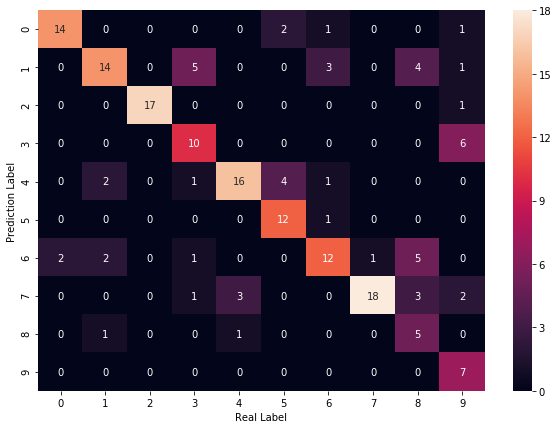

In [13]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [14]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:1 index:[4] real:5
#1 min_error:0 index:[2] real:2
#2 min_error:1 index:[1] real:8
#3 min_error:0 index:[0] real:0
#4 min_error:0 index:[1] real:1
#5 min_error:2 index:[7] real:7
#6 min_error:0 index:[6] real:6
#7 min_error:1 index:[3] real:3
#8 min_error:0 index:[2] real:2
#9 min_error:1 index:[1] real:1
#10 min_error:0 index:[7] real:7
#11 min_error:1 index:[7] real:4
#12 min_error:1 index:[6] real:6
#13 min_error:0 index:[3] real:3
#14 min_error:1 index:[1] real:1
#15 min_error:1 index:[3] real:3
#16 min_error:1 index:[7] real:9
#17 min_error:0 index:[1] real:1
#18 min_error:2 index:[7] real:7
#19 min_error:0 index:[6] real:6
#20 min_error:2 index:[8] real:8
#21 min_error:1 index:[4] real:4
#22 min_error:0 index:[3] real:3
#23 min_error:2 index:[1] real:1
#24 min_error:2 index:[8] real:4
#25 min_error:0 index:[0] real:0
#26 min_error:0 index:[5] real:5
#27 min_error:0 index:[3] real:3
#28 min_error:1 index:[1] real:6
#29 min_error:1 index:[3] real:9
#30 min_error:2 inde

In [15]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(10):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.7087198515769945
Avg Base Learner:0.8515769944341371


In [16]:
from random import randint

list_acc = []

for iii in range(10):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.1388888888888889
Accuracy on training set: 0.17222222222222222
Accuracy on training set: 0.2833333333333333
Accuracy on training set: 0.36666666666666664
Accuracy on training set: 0.4777777777777778
Accuracy on training set: 0.55
Accuracy on training set: 0.5722222222222222
Accuracy on training set: 0.6111111111111112
Accuracy on training set: 0.6055555555555555
Accuracy on training set: 0.6333333333333333


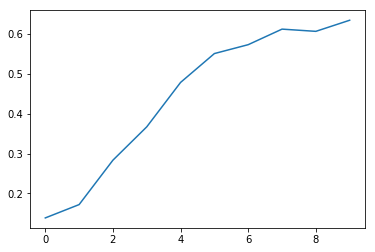

In [17]:
plt.plot(range(10),list_acc)
plt.show()

In [18]:
list_acc

[0.1388888888888889,
 0.17222222222222222,
 0.2833333333333333,
 0.36666666666666664,
 0.4777777777777778,
 0.55,
 0.5722222222222222,
 0.6111111111111112,
 0.6055555555555555,
 0.6333333333333333]